In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot


In [2]:
house = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
house.drop(columns=['area_type','availability','balcony','society'],inplace=True)

In [6]:
house.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
house.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
house['bath'] = house['bath'].fillna(1)

In [9]:
house.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [10]:
house = house.dropna()

In [11]:
house.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
house.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
house['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
house['bhk'] = house['size'].apply(lambda x : int(x.split(' ')[0]))

In [15]:
house.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
house = house.drop('size',axis='columns')

In [17]:
house.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [18]:
house['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def convert(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
house['total_sqft'] = house['total_sqft'].apply(convert)

In [21]:
house.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   total_sqft  13257 non-null  float64
 2   bath        13303 non-null  float64
 3   price       13303 non-null  float64
 4   bhk         13303 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 623.6+ KB


In [23]:
house['price_per_sqft'] = house['price']*100000/house['total_sqft']

In [24]:
loc_stats = house.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [25]:
loc_stats

location
Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [26]:
len(loc_stats[loc_stats<=10])

1063

In [27]:
loc_less_than_10 = loc_stats[loc_stats<=10]
len(loc_less_than_10)

1063

In [28]:
house['location'] = house['location'].apply(lambda x : 'other' if x in loc_less_than_10 else x)

In [29]:
len(house['location'].unique())

242

In [30]:
house.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [31]:
house['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [32]:
house[house.total_sqft/house.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [33]:
house.shape

(13303, 6)

In [34]:
house = house[~(house.total_sqft/house.bhk<300)]
house.shape

(12559, 6)

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
house = remove_pps_outliers(house)
house.shape

(10289, 6)

In [36]:
import matplotlib.pyplot as plt

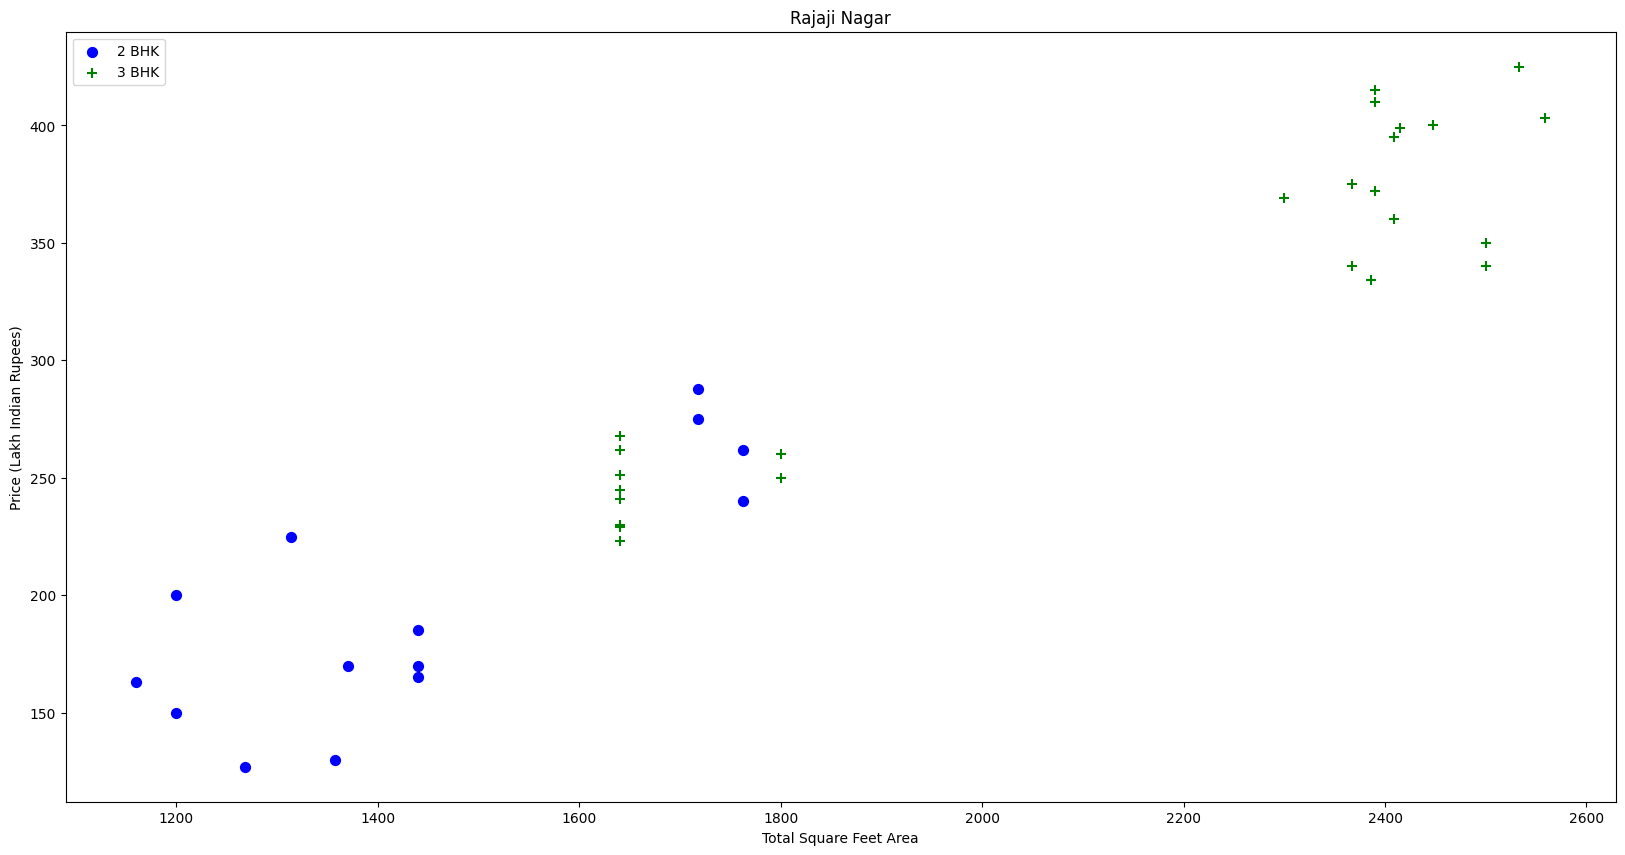

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(house,"Rajaji Nagar")

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
house = remove_bhk_outliers(house)
# df8 = df7.copy()
house.shape

(6805, 6)

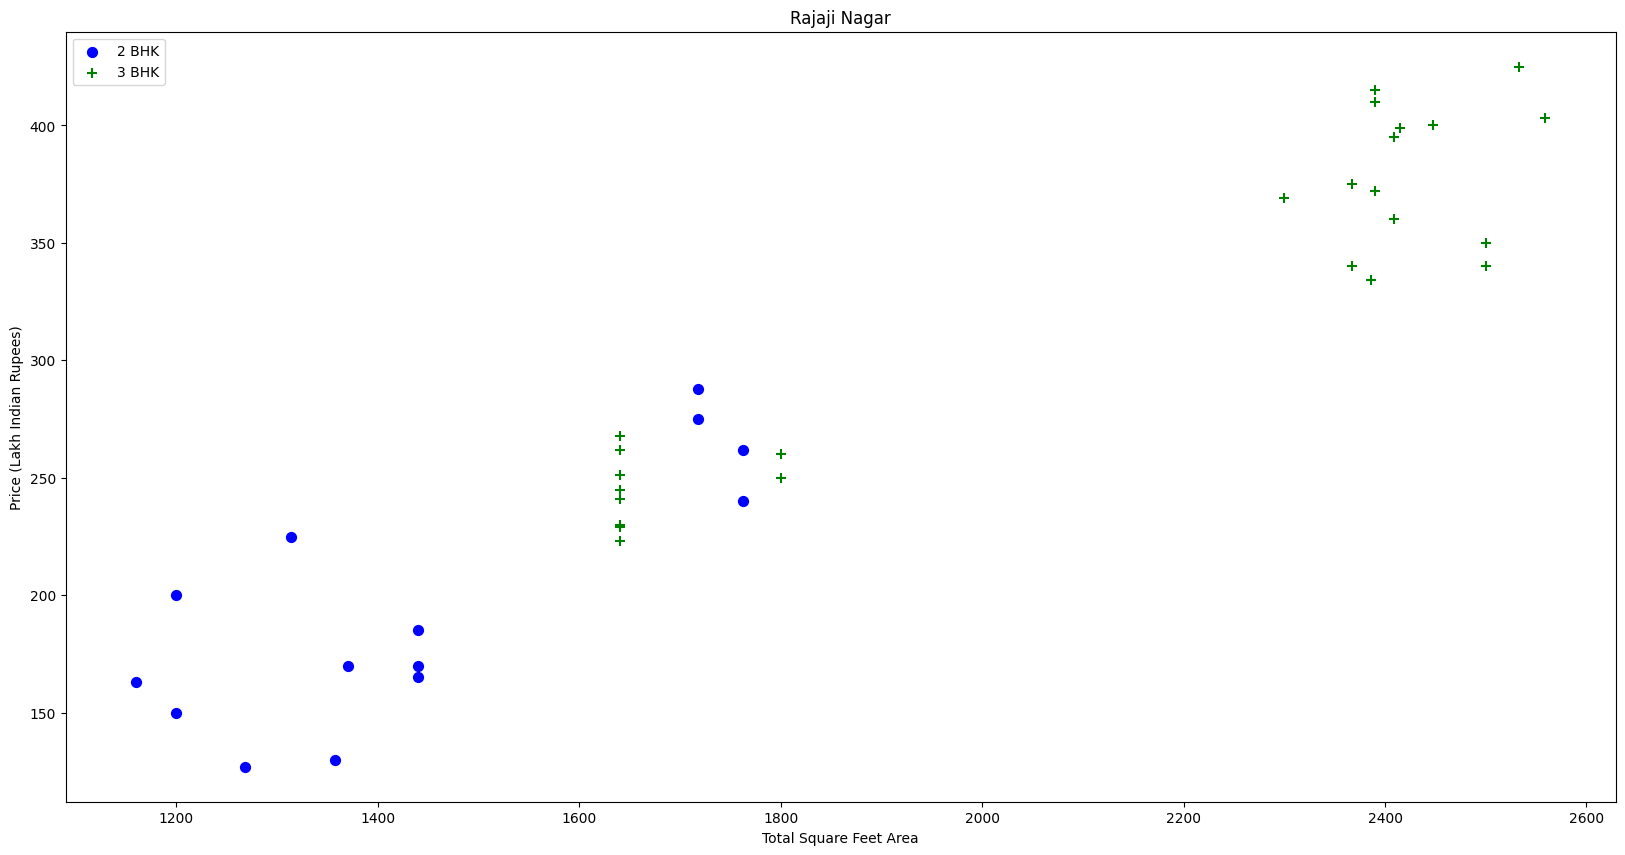

In [44]:
plot_scatter_chart(house,"Rajaji Nagar")

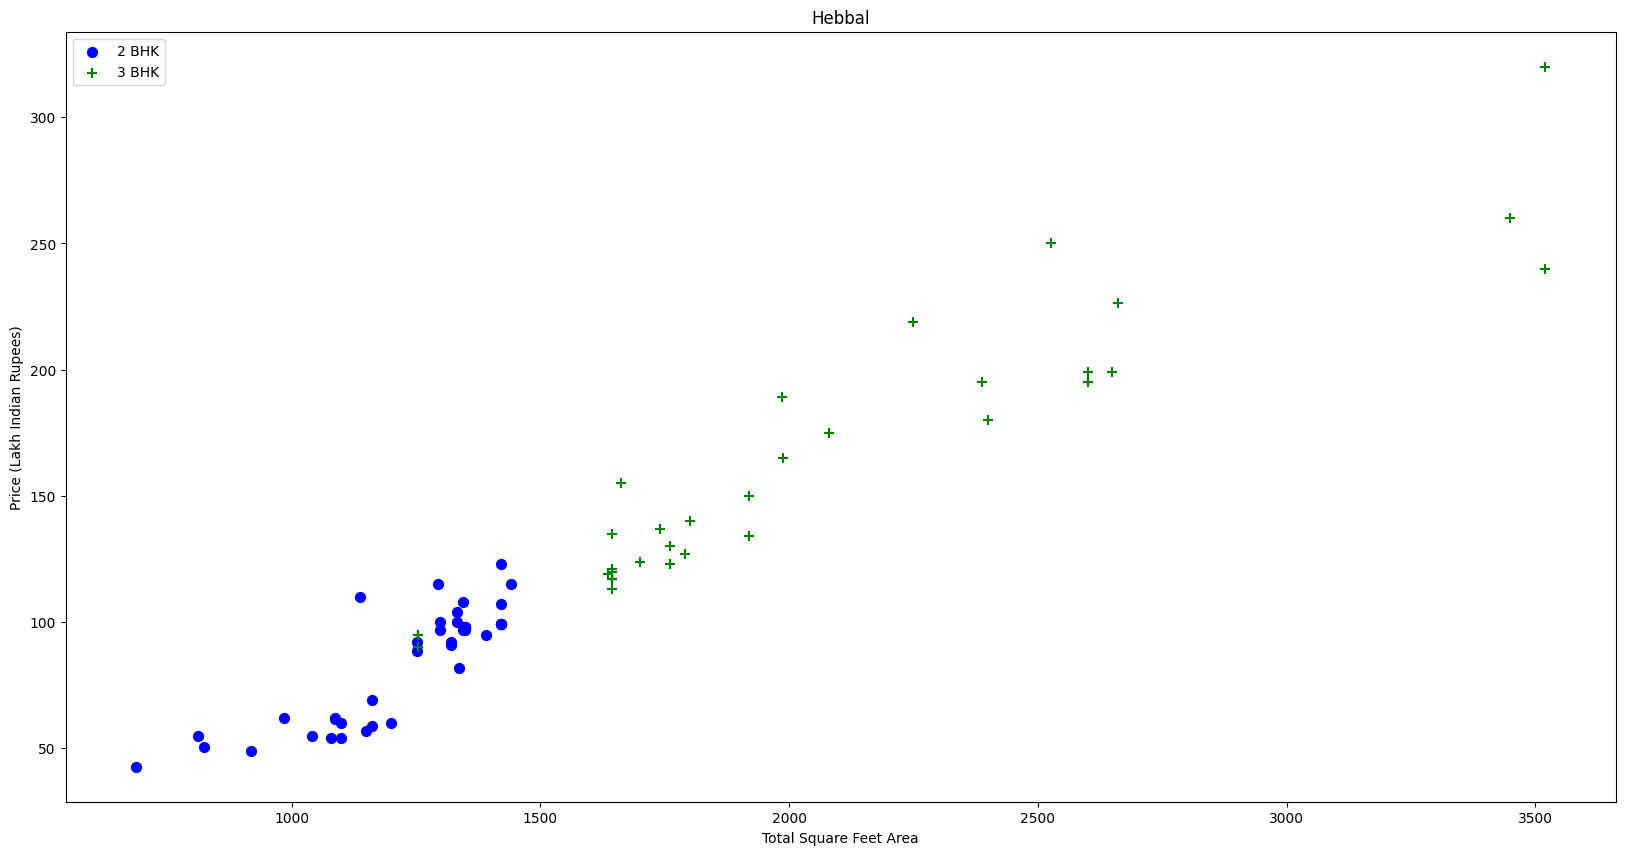

In [45]:
plot_scatter_chart(house,"Hebbal")

Text(0, 0.5, 'Count')

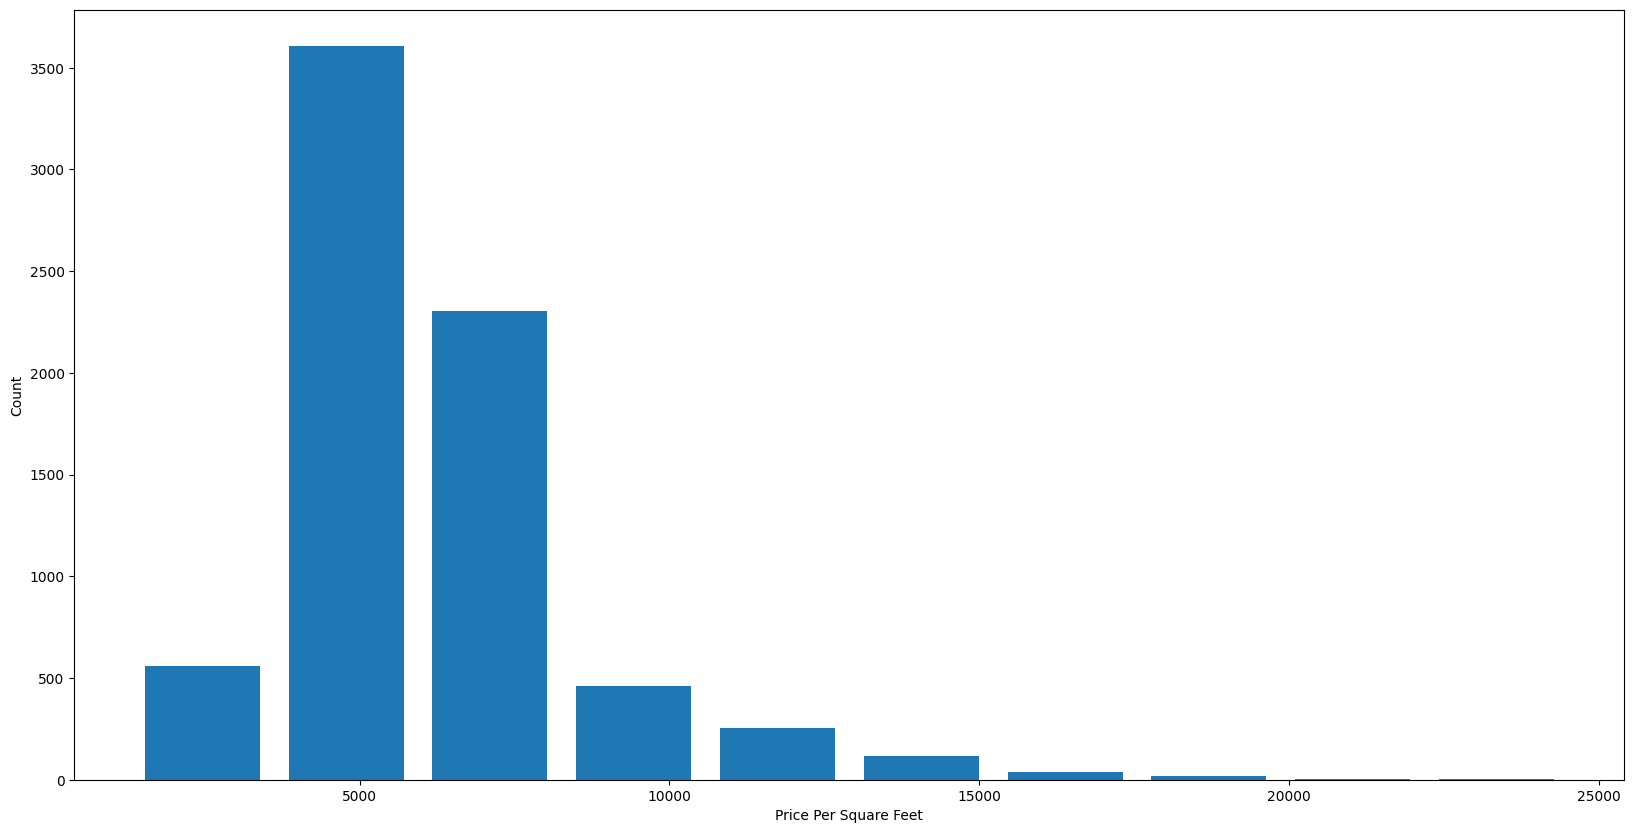

In [41]:
import matplotlib

plt.hist(house.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [53]:
house = house[house['bath']<10]

In [56]:
house.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [58]:
house.drop(['price_per_sqft'],axis = 'columns',inplace=True)

C:\Users\lucky\AppData\Local\Temp\ipykernel_12884\460642844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.drop(['price_per_sqft'],axis = 'columns',inplace=True)


In [59]:
house.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [62]:
dummies_house = pd.get_dummies(house['location'])

In [63]:
dummies_house.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
house = pd.concat([dummies_house.drop('other',axis='columns'),house],axis='columns')

In [65]:
house.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,location,total_sqft,bath,price,bhk
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1250.0,2.0,40.0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1200.0,2.0,83.0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1170.0,2.0,40.0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,1425.0,2.0,65.0,3
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Devarachikkanahalli,947.0,2.0,43.0,2


In [66]:
house.drop(columns=['location'],inplace=True)

In [67]:
house.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,price,bhk
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1250.0,2.0,40.0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1200.0,2.0,83.0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1170.0,2.0,40.0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1425.0,2.0,65.0,3
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,947.0,2.0,43.0,2


In [68]:
house.shape

(6800, 245)

In [69]:
X = house.drop(columns=['price'])

In [72]:
X.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,bhk
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1250.0,2.0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200.0,2.0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1170.0,2.0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1425.0,2.0,3
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,947.0,2.0,2


In [73]:
y = house['price']

In [77]:
from sklearn.model_selection import train_test_split


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(X_train,y_train)

LinearRegression()

In [92]:
y_pred = lr.predict(X_test)

In [86]:
lr.score(X_test,y_test)

0.8634416206971164

In [87]:
from sklearn.metrics import accuracy_score

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [95]:
r2

0.8634416206971164

In [96]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [97]:
cv = ShuffleSplit(n_splits=5,test_size=0.33,random_state=0)

In [98]:
cross = cross_val_score(LinearRegression(),X,y,cv=cv)

In [99]:
cross

array([0.83015949, 0.82727444, 0.85925515, 0.84643396, 0.84247705])

In [101]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\Users\lucky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lucky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\lucky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,0.834531,{'fit_intercept': False}
1,lasso,0.701892,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.685283,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [104]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [108]:
predict_price('1st Phase JP Nagar',2000, 2, 2)

c:\Users\lucky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-99197.85908108196

In [107]:
predict_price('1st Phase JP Nagar',1000.0, 3.0, 3)

c:\Users\lucky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-49323.499699720815

In [109]:
import pickle

In [111]:
with open('House prediction model.pkl','wb') as f:
    pickle.dump(lr,f)

In [112]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))